# Creating Analysis Dataframe
This is to be used after the notebook *'adding_features_copy-final.ipynb'*. <br>
This Jupyter Notebook will take the output dataframes from the earlier notebook to create an avarage S&D dataframe which is used in the analysis <br>

Import necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.interpolate import make_interp_spline, UnivariateSpline
import json
from json import JSONEncoder
import ast
import seaborn as sns

# Display all columns in the df
pd.set_option('display.max_columns', None)
# Set the float format to display numbers in standard decimal notation
pd.options.display.float_format = '{:.5f}'.format

Import S&D dataframe:

In [2]:
df = pd.read_csv('/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/3_outputData/edgeVolume_wFeatures.csv')
#merged_df = merged_df[merged_df['Charge_Supply'] != 0]
unique_values = df['Charge_Supply'].value_counts()
display(df.head())
print('Notice 98 edges missing CSs:')
print(unique_values)

,Unnamed: 0,u,v,length,traffic_id,volume,Name,CS_id,geometry,Level,PowerKW_list,Number_Of_Chargers,vol_jan,vol_feb,vol_mar,vol_apr,vol_may,vol_jun,vol_jul,vol_aug,vol_sep,vol_oct,vol_nov,vol_dec,range,actual_range_jan,actual_range_feb,actual_range_mar,actual_range_apr,actual_range_may,actual_range_jun,actual_range_jul,actual_range_aug,actual_range_sep,actual_range_oct,actual_range_nov,actual_range_dec,charge_prob_jan,charge_prob_feb,charge_prob_mar,charge_prob_apr,charge_prob_may,charge_prob_jun,charge_prob_jul,charge_prob_aug,charge_prob_sep,charge_prob_oct,charge_prob_nov,charge_prob_dec,charge_cars_jan,charge_cars_feb,charge_cars_mar,charge_cars_apr,charge_cars_may,charge_cars_jun,charge_cars_jul,charge_cars_aug,charge_cars_sep,charge_cars_oct,charge_cars_nov,charge_cars_dec,new_id,Charge_Supply
0,0,794436,735703,11865.76308,59192V1878201,34276,Frydenlund P-hus,243271,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,379.00000
1,1,794436,735703,11865.76308,59192V1878201,34276,Tjuvholmen Parkering,215792,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22....",15,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,379.00000
2,2,794436,735703,11865.76308,59192V1878201,34276,"Recharge Filipstad, Oslo",243223,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 150.0, 50.0, 150.0, 50.0, 150.0, 50.0, ...",16,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,379.00000
3,3,794436,735703,11865.76308,59192V1878201,34276,Recharge K89,243329,LINESTRING (10.733792828475945 59.909993840978...,3,"[50.0, 50.0, 50.0, 50.0, 22.0, 22.0, 22.0, 22....",11,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,379.00000
4,4,794436,735703,11865.76308,59192V1878201,34276,Idas vei,173544,LINESTRING (10.733792828475945 59.909993840978...,3,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]",8,34276,35539,35016,38122,37843,41610,30198,38625,38102,39098,38699,33801,300,240,240,240,270,300,315,330,330,306,276,245,240,0.04944,0.04944,0.04944,0.04395,0.03955,0.03767,0.03596,0.03596,0.03878,0.04299,0.04823,0.04944,338,351,346,335,299,313,217,277,295,336,373,334,794436_735703,379.00000


Notice 98 edges missing CSs:
379.00000    80
246.60000    72
489.60000    64
1.40000      62
2.80000      55
             ..
17.40000      1
10.60000      1
6.10000       1
9.40000       1
6.60000       1
Name: Charge_Supply, Length: 142, dtype: int64


#### NOTE: Keep in mind the output above about the edges with no CS

Import **ALL** S&D difference dataframes *(every month)*:

In [3]:
# Prepare a list of month abbreviations
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

dfs = {}  # Initialize an empty dictionary to store the DataFrames

for month in months:
    file_path = f'/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/3_outputData/monthlyData/data_{month}.csv'
    dfs[month] = pd.read_csv(file_path)

# Create individual DataFrames for each month
for month in months:
    exec(f"df_{month} = dfs['{month}']")

### Merge all monthly dataframes into one average dataframe:

In [4]:
# Let's assume your dataframes are stored in a dictionary with the keys as the month names:
dataframes_dict = {'jan': df_jan, 'feb': df_feb, 'mar': df_mar, 'apr': df_apr, 
                   'may': df_may, 'jun': df_jun, 'jul': df_jul, 'aug': df_aug, 
                   'sep': df_sep, 'oct': df_oct, 'nov': df_nov, 'dec': df_dec}

# Initialize the final dataframe with 'u' and 'v' columns from any of the monthly dataframes
df_monthlyAvg = dataframes_dict['jan'][['u', 'v']].copy()

# Loop over all 24 hours
for hour in range(24):
    # Calculate column name for each hour
    hour_str = str(hour).zfill(2)  # convert to two digits (e.g. '01', '02', ..., '23')

    # Initialize a list to store values for each month for this hour
    monthly_values = []

    # Loop over all months (dataframes)
    for month, df in dataframes_dict.items():
        # Calculate column name for this month and hour
        column_name = f'diff_hour_{hour_str}_{month}'

        # Append this month's values to the list
        monthly_values.append(df[column_name])

    # Calculate the average over all months for this hour and store in the final dataframe
    df_monthlyAvg[f'diff_hour_{hour_str}_avg'] = pd.concat(monthly_values, axis=1).mean(axis=1)

df_monthlyAvg


,u,v,diff_hour_00_avg,diff_hour_01_avg,diff_hour_02_avg,diff_hour_03_avg,diff_hour_04_avg,diff_hour_05_avg,diff_hour_06_avg,diff_hour_07_avg,diff_hour_08_avg,diff_hour_09_avg,diff_hour_10_avg,diff_hour_11_avg,diff_hour_12_avg,diff_hour_13_avg,diff_hour_14_avg,diff_hour_15_avg,diff_hour_16_avg,diff_hour_17_avg,diff_hour_18_avg,diff_hour_19_avg,diff_hour_20_avg,diff_hour_21_avg,diff_hour_22_avg,diff_hour_23_avg
0,794436,735703,376.42411,377.35251,377.79227,377.91888,377.67632,375.81349,368.80034,363.08142,363.95727,364.35534,361.63577,358.61320,357.10373,356.10277,354.04367,351.02901,353.44877,357.31403,360.22278,363.24645,366.24599,369.24896,372.05658,374.68299
1,794436,1394577,246.07996,246.26739,246.35617,246.38174,246.33277,245.95668,244.54081,243.38623,243.56306,243.64342,243.09437,242.48415,242.17941,241.97733,241.56162,240.95300,241.44152,242.22187,242.80911,243.41955,244.02512,244.63139,245.19821,245.72845
2,794436,1613461,83.62285,84.62379,85.09790,85.23441,84.97290,82.96452,75.40340,69.23765,70.18193,70.61110,67.67905,64.42031,62.79291,61.71374,59.49375,56.24355,58.85237,63.01964,66.15566,69.41558,72.64948,75.88709,78.91407,81.74568
3,794436,1337200,60.73018,62.19702,62.89182,63.09187,62.70863,59.76542,48.68485,39.64914,41.03296,41.66189,37.36507,32.58949,30.20459,28.62310,25.36978,20.60672,24.42986,30.53685,35.13259,39.90989,44.64907,49.39367,53.82962,57.97925
4,794436,492484,63.13992,63.73825,64.02165,64.10326,63.94693,62.74640,58.22665,54.54099,55.10545,55.36199,53.60932,51.66136,50.68856,50.04347,48.71645,46.77360,48.33306,50.82409,52.69869,54.64735,56.58045,58.51577,60.32519,62.01782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,983298,982587,2.41774,2.55551,2.62077,2.63956,2.60357,2.32712,1.28636,0.43767,0.56765,0.62672,0.22314,-0.22541,-0.44942,-0.59796,-0.90354,-1.35091,-0.99182,-0.41821,0.01345,0.46216,0.90730,1.35294,1.76959,2.15935
356,973720,293942,7.76866,8.10433,8.26333,8.30911,8.22141,7.54788,5.01218,2.94443,3.26111,3.40504,2.42174,1.32889,0.78313,0.42122,-0.32328,-1.41326,-0.53837,0.85916,1.91086,3.00410,4.08863,5.17439,6.18952,7.13913
357,413112,982587,6.42778,6.48985,6.51925,6.52772,6.51150,6.38695,5.91806,5.53570,5.59426,5.62087,5.43905,5.23696,5.13604,5.06912,4.93145,4.72989,4.89167,5.15010,5.34458,5.54673,5.74728,5.94806,6.13577,6.31137
358,973673,987955,2.65610,2.67192,2.67942,2.68158,2.67744,2.64569,2.52617,2.42871,2.44363,2.45042,2.40407,2.35256,2.32683,2.30977,2.27468,2.22331,2.26454,2.33042,2.37999,2.43152,2.48264,2.53382,2.58167,2.62643


### Plot The Average Dataframe With All The Other Months:

In [5]:
""" # Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    plt.plot(hours, averages, label=month)

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show() """


" # Add the average dataframe to the dictionary for easy iteration\ndataframes_dict['avg'] = df_monthlyAvg\n\nplt.figure(figsize=(12, 6))\n\n# Loop over all dataframes\nfor month, df in dataframes_dict.items():\n    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot\n    averages = df.drop(['u', 'v'], axis=1).mean()\n    # Extract hour from column names\n    hours = [int(x.split('_')[2]) for x in averages.index]\n    plt.plot(hours, averages, label=month)\n\nplt.xlabel('Hour')\nplt.ylabel('Average Value')\nplt.title('Average values for each hour across all months')\nplt.legend()\nplt.grid(True)\nplt.xticks(range(24))  # ensure x-axis labels show every hour\nplt.show() "

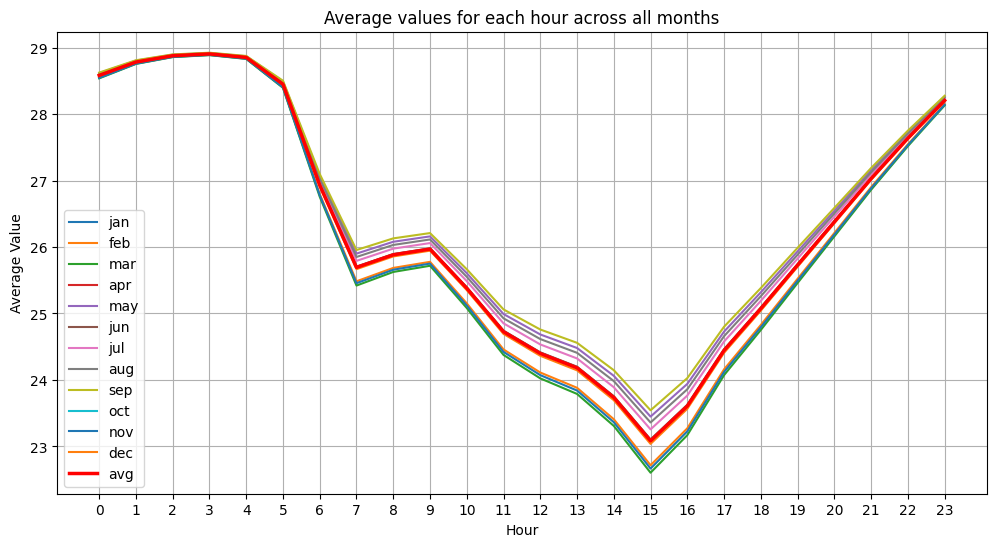

In [6]:
# Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    
    if month == 'avg':
        plt.plot(hours, averages, label=month, linewidth=2.5, color='red') # avg line in green color with more width
    else:
        plt.plot(hours, averages, label=month)

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show()


The same plot, but the "warm" months in red, and the "cold" months in blue:

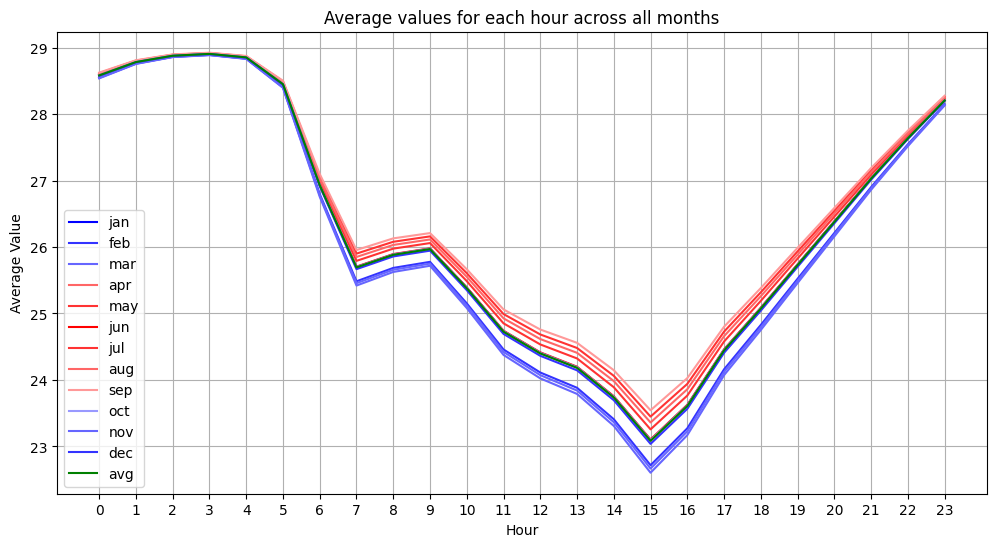

In [7]:
# Define a color dictionary with lighter colors
colors = {"jan": (0, 0, 1), "feb": (0.2, 0.2, 1), "mar": (0.4, 0.4, 1), 
          "apr": (1, 0.4, 0.4), "may": (1, 0.2, 0.2), "jun": (1, 0, 0),
          "jul": (1, 0.2, 0.2), "aug": (1, 0.4, 0.4), "sep": (1, 0.6, 0.6), 
          "oct": (0.6, 0.6, 1), "nov": (0.4, 0.4, 1), "dec": (0.2, 0.2, 1), 
          "avg": "green"}

# Add the average dataframe to the dictionary for easy iteration
dataframes_dict['avg'] = df_monthlyAvg

plt.figure(figsize=(12, 6))

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Calculate the mean of each column (excluding 'u', 'v'), extract hour number and plot
    averages = df.drop(['u', 'v'], axis=1).mean()
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in averages.index]
    plt.plot(hours, averages, color=colors[month], label=month)  # Use the colors dictionary

plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Average values for each hour across all months')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # ensure x-axis labels show every hour
plt.show()


### Plot S&D Difference for 100 Edges in a Heatmap:

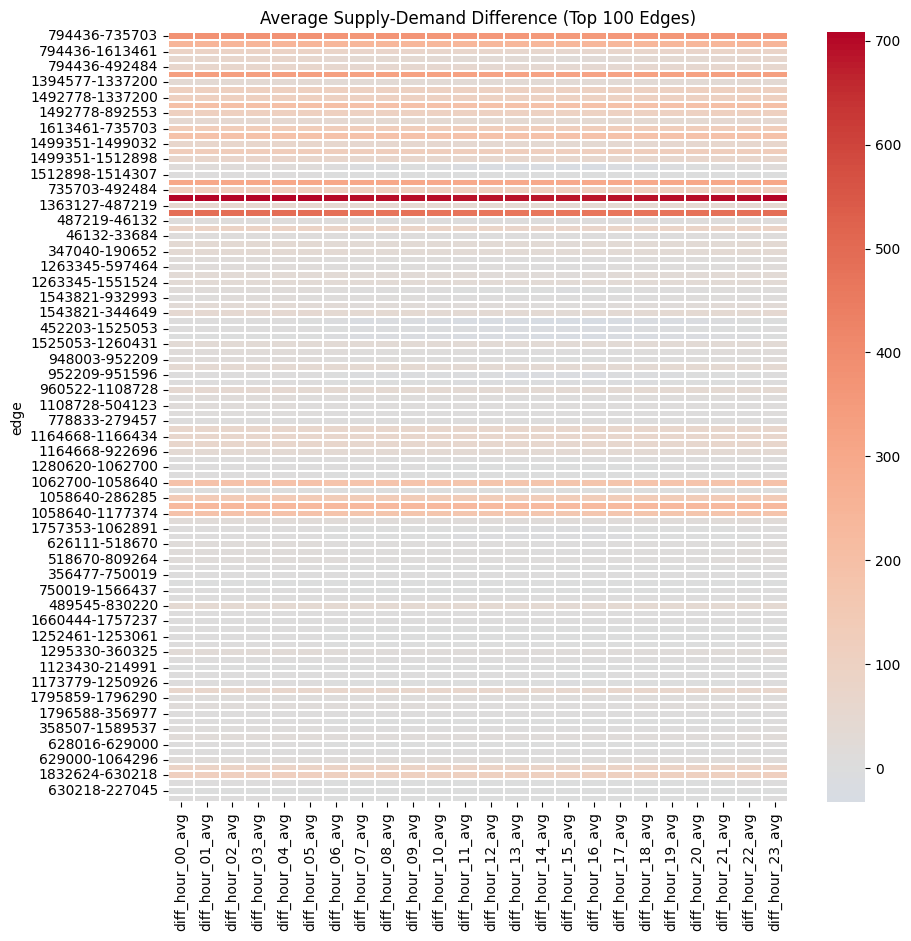

In [8]:
# Prepare the data for the heatmap
data_to_plot = df_monthlyAvg.drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = df_monthlyAvg[["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 100

# Set the figure size
plt.figure(figsize=(10, 10))

# Create the heatmap
sns.heatmap(data_to_plot.head(num_rows), cmap="coolwarm", center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Average Supply-Demand Difference (Top {num_rows} Edges)")

# Show the plot
plt.show()



Check one specific edge S&D difference:

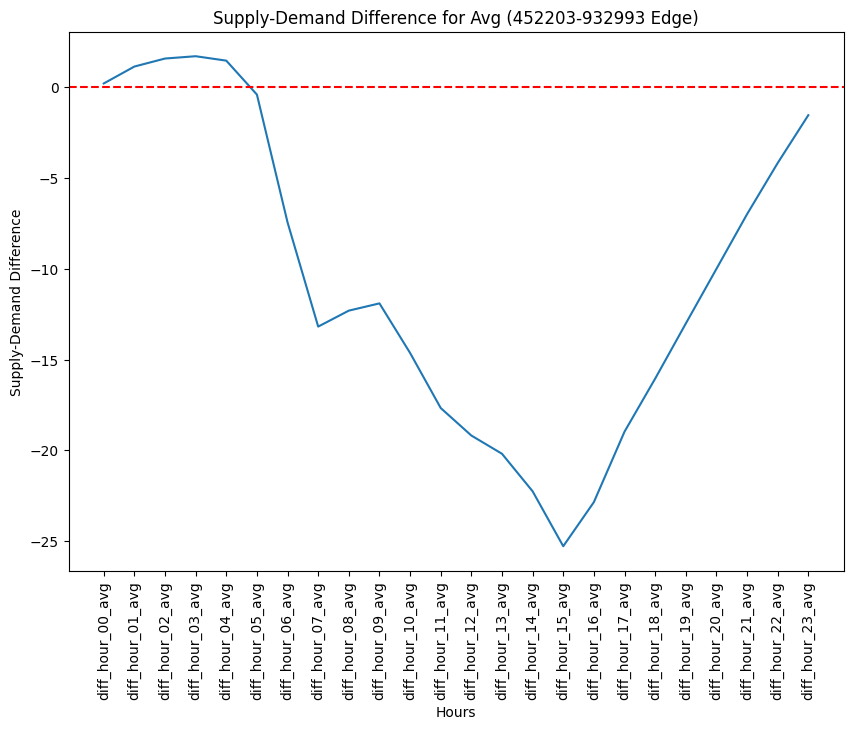

In [9]:
# Choose the specific edge (u, v) you want to visualize
selected_u = 452203
selected_v = 932993

# Prepare the data for the line chart
edge_data = df_monthlyAvg.query("u == @selected_u and v == @selected_v")
edge_data = edge_data.drop(["u", "v"], axis=1).T

# Set the figure size
plt.figure(figsize=(10, 7))
plt.plot(edge_data.index, edge_data.values)     # Create the line chart
plt.xlabel("Hours")                             # Add labels and a title to the plot
plt.ylabel("Supply-Demand Difference")
plt.title(f"Supply-Demand Difference for {month.capitalize()} ({selected_u}-{selected_v} Edge)")
plt.xticks(rotation='vertical')                 # Add vertical x-axis text
plt.axhline(0, color='red', linestyle='--')     # Add a horizontal dashed line at y=0

plt.show()                                      # Show the plot


Same S&D difference, but with all the other months as well: 

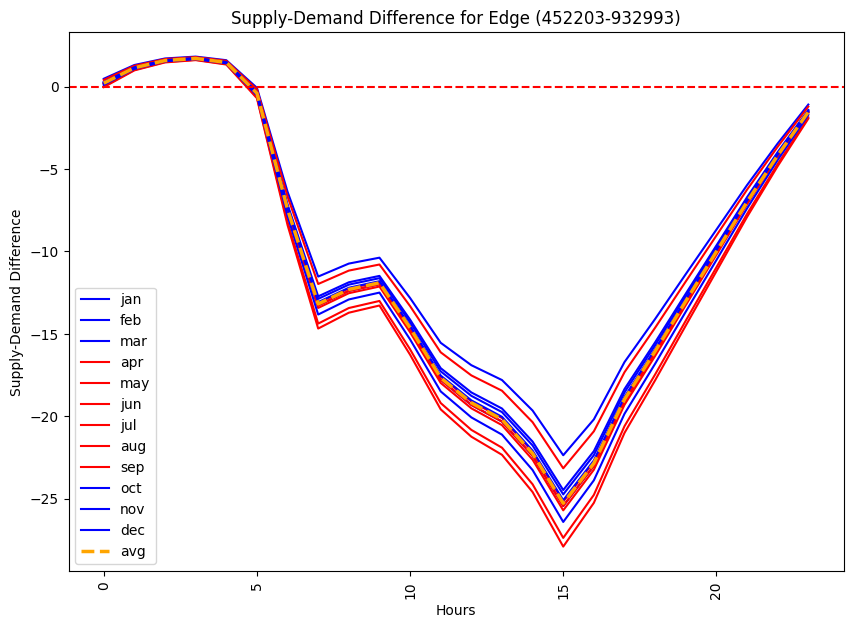

In [10]:
# Choose the specific edge (u, v) you want to visualize
selected_u = 452203#1263345#487219#452203
selected_v = 932993#1063277#46132#932993

plt.figure(figsize=(10, 7))

# Define a color dictionary
colors = {"jan": "blue", "feb": "blue", "mar": "blue", "apr": "red", "may": "red", "jun": "red",
          "jul": "red", "aug": "red", "sep": "red", "oct": "blue", "nov": "blue", "dec": "blue", "avg": "orange"}

# Loop over all dataframes
for month, df in dataframes_dict.items():
    # Prepare the data for the line chart
    edge_data = df.query("u == @selected_u and v == @selected_v")
    edge_data = edge_data.drop(["u", "v"], axis=1)
    # Extract hour from column names
    hours = [int(x.split('_')[2]) for x in edge_data.columns]
    edge_data.columns = hours
    edge_data = edge_data.T

        # Create the line chart with different linewidth and style for 'avg'
    if month == 'avg':
        plt.plot(edge_data.index, edge_data.values.squeeze(), label=month, color=colors[month], linewidth=2.5, linestyle='dashed')
    else:
        plt.plot(edge_data.index, edge_data.values.squeeze(), label=month, color=colors[month])     

plt.xlabel("Hours")                             # Add labels and a title to the plot
plt.ylabel("Supply-Demand Difference")
plt.title(f"Supply-Demand Difference for Edge ({selected_u}-{selected_v})")
plt.xticks(rotation='vertical')                 # Add vertical x-axis text
plt.axhline(0, color='red', linestyle='--')     # Add a horizontal dashed line at y=0
plt.legend()                                    # Add legend to the plot

plt.show()                                      # Show the plot


### Another Heatmap showing served, partially served, and underserved edges:

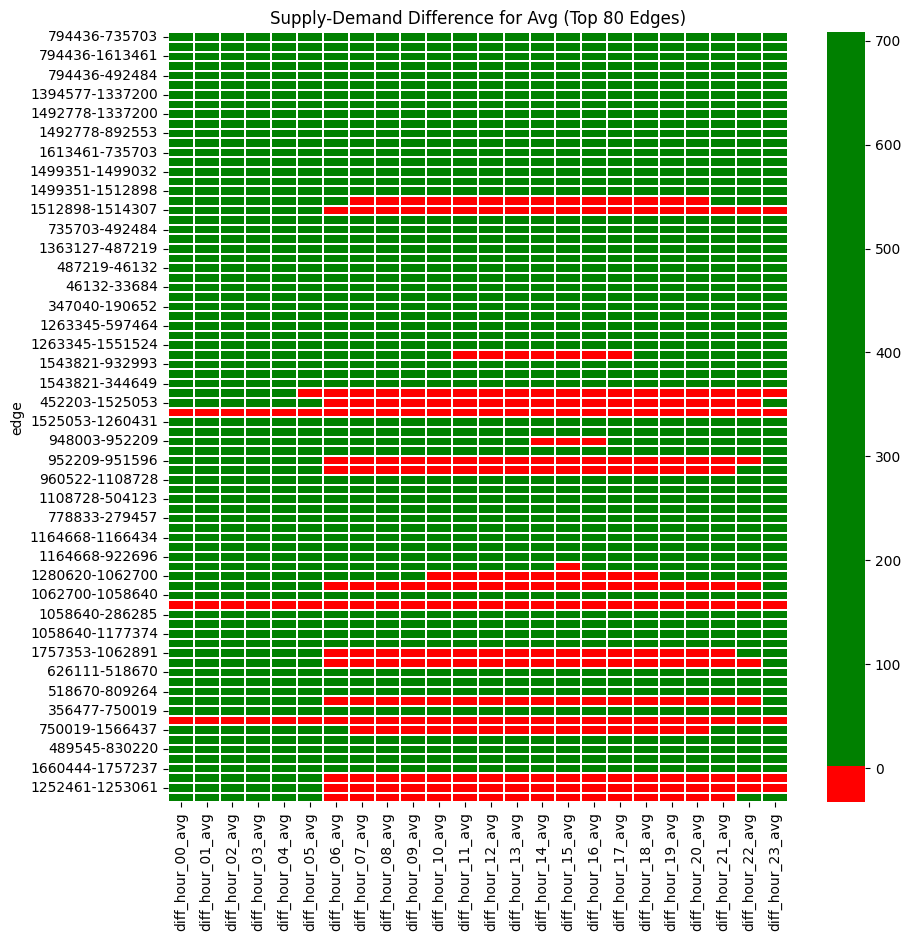

In [11]:
# Prepare the data for the heatmap
data_to_plot = df_monthlyAvg.drop(["u", "v"], axis=1)

# Pivot the data so that rows represent edges and columns represent hours
data_to_plot["edge"] = df_monthlyAvg[["u", "v"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1)
data_to_plot = data_to_plot.set_index("edge")

# Number of rows to display
num_rows = 80

# Set the figure size
plt.figure(figsize=(10, 10))

# Create custom colormap for the heatmap
custom_cmap = ListedColormap(['red', 'green'])

# Create the heatmap with custom colormap and center at 0
sns.heatmap(data_to_plot.head(num_rows), cmap=custom_cmap, center=0, linewidths=0.1, linecolor="white")

# Add a title to the plot
plt.title(f"Supply-Demand Difference for {month.capitalize()} (Top {num_rows} Edges)")

# Show the plot
plt.show()


## Categorizing edges by being ***Served***, ***Partially Served*** or ***Underserved***:
Also adding a column categorizing *when* the edge is underserved.

In [12]:
# Create new DataFrame to store the classifications
classification_df = pd.DataFrame(index=df_monthlyAvg.index, columns=["edge_classification", "TimeServed"])

# Iterate over the edges
for edge in df_monthlyAvg.index:
    # Get the supply-demand difference values for the edge
    diff_values = df_monthlyAvg.loc[edge, df_monthlyAvg.columns[2:]]
    
    # Classify the overall edge supply-demand difference
    if (diff_values > 0).all():
        classification_df.loc[edge, "edge_classification"] = 1  # All values are positive
    elif (diff_values < 0).all():
        classification_df.loc[edge, "edge_classification"] = -1  # All values are negative
    else:
        classification_df.loc[edge, "edge_classification"] = 0  # Values are mixed (both positive and negative)
    
    # Get the supply-demand difference values for specific time frames
    morning_values = diff_values.filter(regex='diff_hour_0[6-9]_avg|diff_hour_1[0-1]_avg')
    afternoon_values = diff_values.filter(regex='diff_hour_1[2-7]_avg')
    
    # TimeServed classification
    if (morning_values < 0).all() and (afternoon_values >= 0).all():
        classification_df.loc[edge, "TimeServed"] = 'X'  # Negative in the morning (06-11), non-negative in the afternoon (12-17)
    elif (afternoon_values < 0).all() and (morning_values >= 0).all():
        classification_df.loc[edge, "TimeServed"] = 'Y'  # Negative in the afternoon (12-17), non-negative in the morning (06-11)
    elif (morning_values < 0).all() and (afternoon_values < 0).all():
        classification_df.loc[edge, "TimeServed"] = 'Z'  # Negative in both time frames (06-17)
    else:
        classification_df.loc[edge, "TimeServed"] = 0  # A mix of positive and negative values in either or both time frames

# Merge the classification DataFrame with the original DataFrame
df_monthlyAvg = pd.concat([df_monthlyAvg, classification_df], axis=1)

# Display the updated DataFrame
df_monthlyAvg.head()


,u,v,diff_hour_00_avg,diff_hour_01_avg,diff_hour_02_avg,diff_hour_03_avg,diff_hour_04_avg,diff_hour_05_avg,diff_hour_06_avg,diff_hour_07_avg,diff_hour_08_avg,diff_hour_09_avg,diff_hour_10_avg,diff_hour_11_avg,diff_hour_12_avg,diff_hour_13_avg,diff_hour_14_avg,diff_hour_15_avg,diff_hour_16_avg,diff_hour_17_avg,diff_hour_18_avg,diff_hour_19_avg,diff_hour_20_avg,diff_hour_21_avg,diff_hour_22_avg,diff_hour_23_avg,edge_classification,TimeServed
0,794436,735703,376.42411,377.35251,377.79227,377.91888,377.67632,375.81349,368.80034,363.08142,363.95727,364.35534,361.63577,358.61320,357.10373,356.10277,354.04367,351.02901,353.44877,357.31403,360.22278,363.24645,366.24599,369.24896,372.05658,374.68299,1,0
1,794436,1394577,246.07996,246.26739,246.35617,246.38174,246.33277,245.95668,244.54081,243.38623,243.56306,243.64342,243.09437,242.48415,242.17941,241.97733,241.56162,240.95300,241.44152,242.22187,242.80911,243.41955,244.02512,244.63139,245.19821,245.72845,1,0
2,794436,1613461,83.62285,84.62379,85.09790,85.23441,84.97290,82.96452,75.40340,69.23765,70.18193,70.61110,67.67905,64.42031,62.79291,61.71374,59.49375,56.24355,58.85237,63.01964,66.15566,69.41558,72.64948,75.88709,78.91407,81.74568,1,0
3,794436,1337200,60.73018,62.19702,62.89182,63.09187,62.70863,59.76542,48.68485,39.64914,41.03296,41.66189,37.36507,32.58949,30.20459,28.62310,25.36978,20.60672,24.42986,30.53685,35.13259,39.90989,44.64907,49.39367,53.82962,57.97925,1,0
4,794436,492484,63.13992,63.73825,64.02165,64.10326,63.94693,62.74640,58.22665,54.54099,55.10545,55.36199,53.60932,51.66136,50.68856,50.04347,48.71645,46.77360,48.33306,50.82409,52.69869,54.64735,56.58045,58.51577,60.32519,62.01782,1,0


In [13]:
print('------------------------------------------------------------------------------------------')
print('All values are positive (served):', len(df_monthlyAvg.query('edge_classification == 1')))
print('Mixed values (partially served, categorized as underserved):', len(df_monthlyAvg.query('edge_classification == 0')))
print('------------------------------------------------------------------------------------------')
print('Underserved 06 to 17 (or later):', len(df_monthlyAvg.query('TimeServed == "Z"')))
print('Underserved in timeframe 12-17:', len(df_monthlyAvg.query('TimeServed == "Y"')))
print('Underserved in timeframe 06-12:', len(df_monthlyAvg.query('TimeServed == "X"')))


------------------------------------------------------------------------------------------
All values are positive (served): 261
Mixed values (partially served, categorized as underserved): 99
------------------------------------------------------------------------------------------
Underserved 06 to 17 (or later): 25
Underserved in timeframe 12-17: 5
Underserved in timeframe 06-12: 0


In [14]:
#df_monthlyAvg.drop(columns='edge_classification', inplace=True)
#df_monthlyAvg.drop(columns='TimeServed', inplace=True)

## Store Dataframe:

In [15]:
path = '/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/FinalDataProcessing/AddingFeatures/3_outputData/monthlyData/avg_SandD_dataframe.csv'
df_monthlyAvg.to_csv(path, index=False)